<a href="https://colab.research.google.com/github/guirzr1/MACHINE-LEARNING-REGRESSAO/blob/main/Desafios__MaoNaMassa__Alura__Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o notebook

Aproveite esse espaço para as atividades do curso de **Data Science: transformando variáveis para uma Regressão Linear** da Alura. Aqui você pode escrever e testar os códigos dos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Sinta-se livre para adicionar mais células e ajustar da forma que você deseja!


Logo abaixo, temos a url onde está localizada a base que será utilizada neste projeto.
>**Atenção:** Esta base é diferente daquela que estamos utilizando nas aulas!

Observe abaixo os dados disponíveis em nossa base:

* **valor**: valor do aluguel da hospedagem para 2 diárias de até 4 pessoas em reais. Essa é a variável alvo que é o que se deseja prever de acordo com os atributos da propriedade;
* **area**: a área da hospedagem, medida em metros quadrados;
* **dist_praia**: distância da hospedagem até a praia mais próxima, em quilômetros;
* **dist_mercado**: distância da hospedagem até o mercado mais próximo, em quilômetros;
* **piscina**: variável binária que indica se a hospedagem possui ou não uma piscina. Pode ser representada como 1 para "sim" e 0 para "não".



In [ ]:
url_hospedagens = "https://raw.githubusercontent.com/alura-cursos/data-science-regressao-linear/main/dados/hospedagens.csv"

## **Aula 01 - Análises preliminares**

### Mão na Massa - Explorando os dados

---



#### **Lendo e Explorando os dados**

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv(url_hospedagens)

In [ ]:
dados.head()

,valor,area,dist_praia,dist_mercado,piscina
0,4600.0,280,0.241,0.794,1
1,900.0,208,0.904,0.134,1
2,2550.0,170,0.060,0.423,1
3,550.0,100,2.883,0.525,0
4,2200.0,164,0.240,0.192,0


In [ ]:
dados.shape

(5000, 5)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   valor         5000 non-null   float64
 1   area          5000 non-null   int64  
 2   dist_praia    5000 non-null   float64
 3   dist_mercado  5000 non-null   float64
 4   piscina       5000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 195.4 KB


#### **Entendendo a relação dos dados**

In [ ]:
correlacao = dados.corr().round(3)
correlacao

,valor,area,dist_praia,dist_mercado,piscina
valor,1.000,0.711,-0.367,-0.024,0.295
area,0.711,1.000,-0.283,-0.031,0.300
dist_praia,-0.367,-0.283,1.000,0.026,-0.323
dist_mercado,-0.024,-0.031,0.026,1.000,-0.005
piscina,0.295,0.300,-0.323,-0.005,1.000


In [ ]:
correlacao["valor"].to_frame()

,valor
valor,1.000
area,0.711
dist_praia,-0.367
dist_mercado,-0.024
piscina,0.295


> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

#### **Regressão linear com uma variável independente**

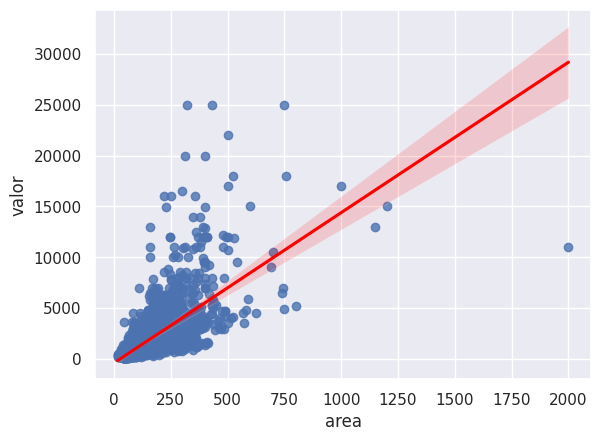

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.regplot(x="area", y="valor", data=dados, line_kws={"color": "red"})
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>


Adicione aqui suas hipóteses e interpretações dos dados!

## **Aula 02 - Análises gráficas**

### Mão na Massa - Investigando o comportamento das variáveis

#### **Comportamento da variável dependente**

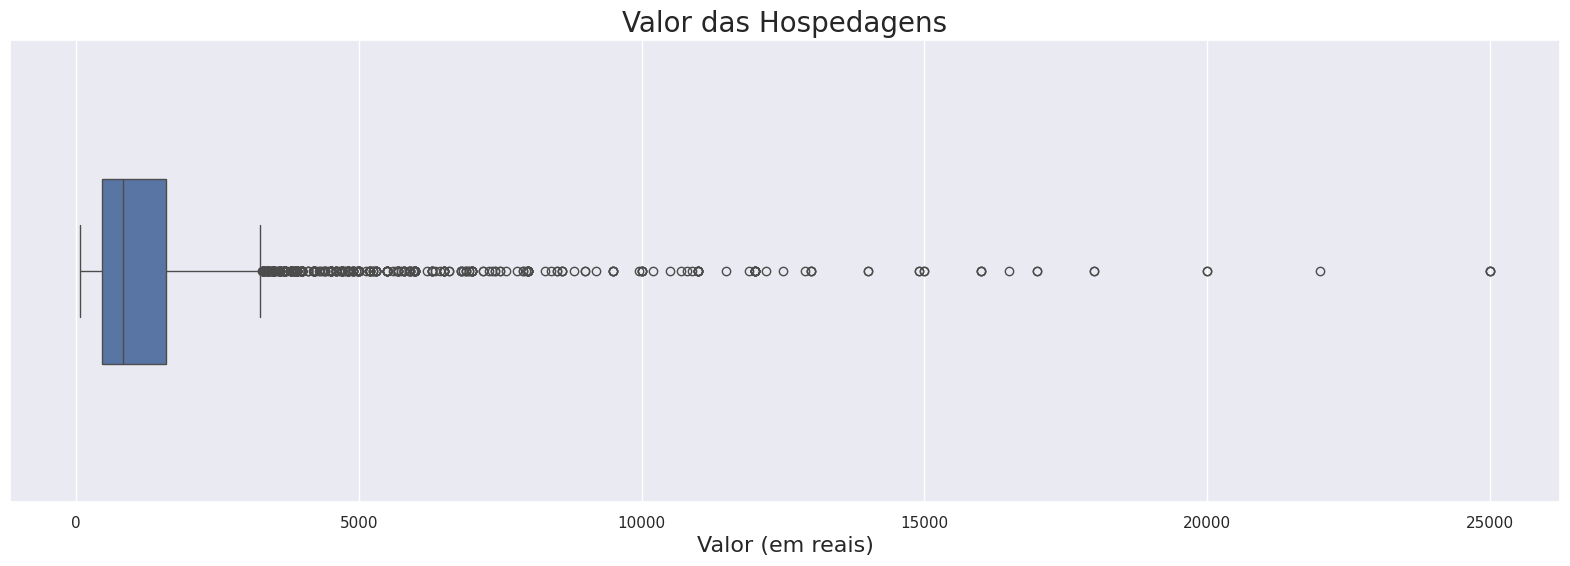

In [ ]:
ax = sns.boxplot(dados, x ="valor", width=0.4)

ax.figure.set_size_inches(20, 6)
ax.set_title('Valor das Hospedagens', fontsize=20)
ax.set_xlabel('Valor (em reais)', fontsize=16)
plt.show()

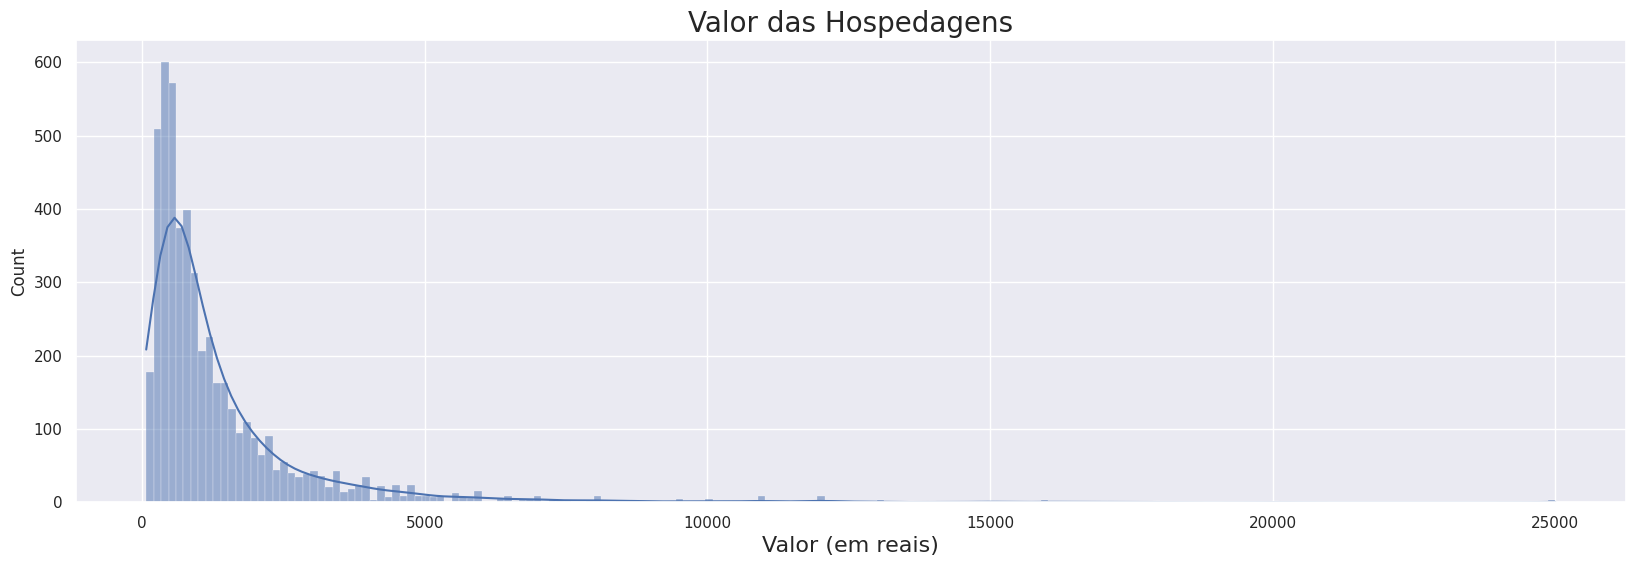

In [ ]:
ax = sns.histplot(data=dados, x="valor", kde=True)
ax.figure.set_size_inches(20, 6)
ax.set_title('Valor das Hospedagens', fontsize=20)
ax.set_xlabel('Valor (em reais)', fontsize=16)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Análise das variáveis explicativas em relação ao valor**

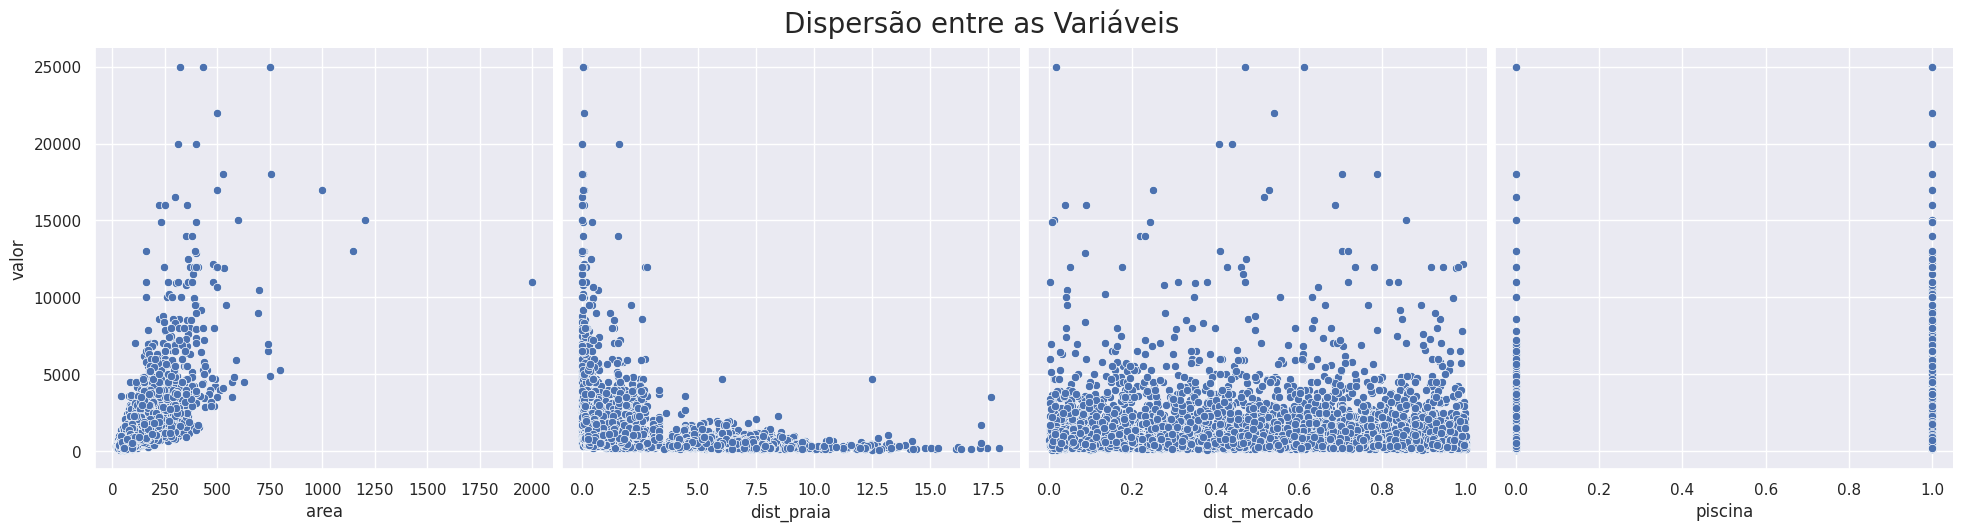

In [ ]:
# Pairplot sem reta de regressão
ax = sns.pairplot(dados, y_vars="valor", x_vars= ['area', 'dist_praia', 'dist_mercado', 'piscina'], height = 5)
ax.figure.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
plt.show()

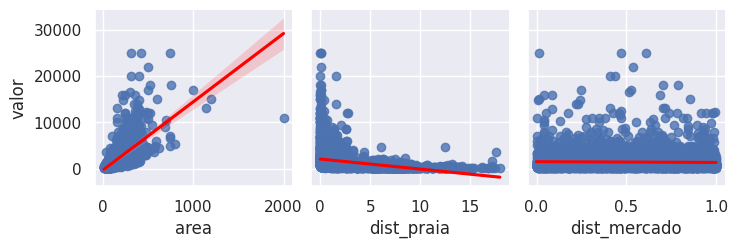

In [ ]:
# Pairplot com reta de regressão
sns.pairplot(dados, y_vars="valor", x_vars= ['area', 'dist_praia', 'dist_mercado'],
             kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

## **Aula 03 - Transformação de variáveis**

### Mão na Massa - Transformando os dados e verificando suas relações

### **Transformando os dados**

In [ ]:
dados.describe()

,valor,area,dist_praia,dist_mercado,piscina
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1402.926374,121.944800,3.021928,0.497156,0.505600
std,1883.268839,90.536969,3.170927,0.291359,0.500019
min,75.000000,16.000000,0.000000,0.000000,0.000000
25%,460.000000,70.000000,0.438000,0.239000,0.000000
50%,820.000000,93.000000,1.476500,0.503000,1.000000
75%,1590.000000,146.000000,5.605500,0.748000,1.000000
max,25000.000000,2000.000000,17.963000,1.000000,1.000000


In [ ]:
import numpy as np

dados['log_valor'] = np.log(dados['valor'])
dados['log_area'] = np.log(dados['area'])
dados['log_dist_praia'] = np.log1p(dados['dist_praia'])
dados['log_dist_mercado'] = np.log1p(dados['dist_mercado'])

In [ ]:
dados.head()

,valor,area,dist_praia,dist_mercado,piscina,log_valor,log_area,log_dist_praia,log_dist_mercado
0,4600.0,280,0.241,0.794,1,8.433812,5.634790,0.215918,0.584448
1,900.0,208,0.904,0.134,1,6.802395,5.337538,0.643957,0.125751
2,2550.0,170,0.060,0.423,1,7.843849,5.135798,0.058269,0.352767
3,550.0,100,2.883,0.525,0,6.309918,4.605170,1.356608,0.421994
4,2200.0,164,0.240,0.192,0,7.696213,5.099866,0.215111,0.175633


> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Distribuição de frequências da variável dependente transformada**

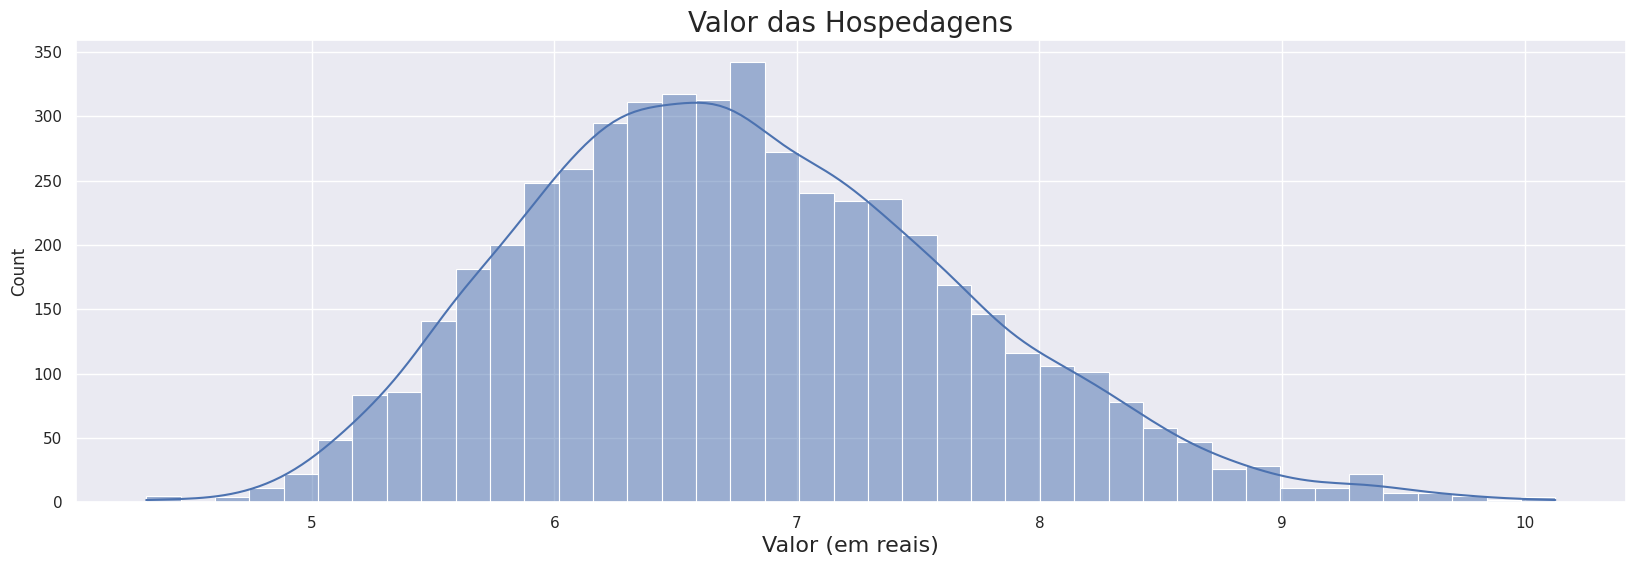

In [ ]:
ax = sns.histplot(data=dados, x="log_valor", kde=True)
ax.figure.set_size_inches(20, 6)
ax.set_title('Valor das Hospedagens', fontsize=20)
ax.set_xlabel('Valor (em reais)', fontsize=16)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Análise das variáveis explicativas transformadas em relação ao valor**

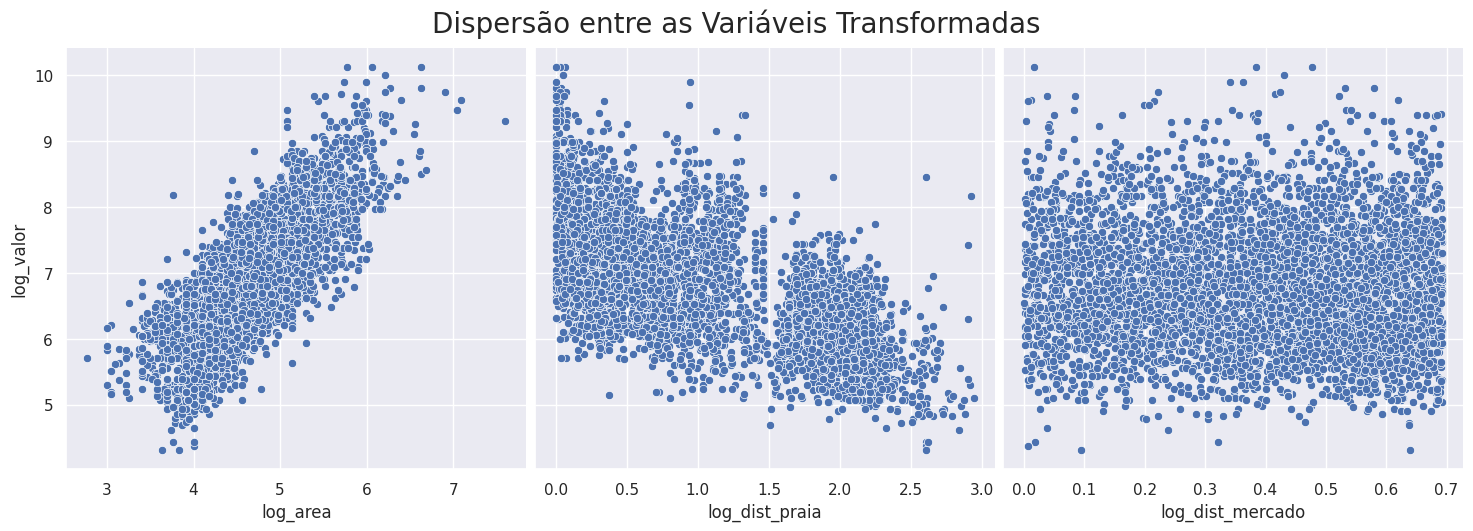

In [ ]:
ax = sns.pairplot(dados, y_vars="log_valor", x_vars= ['log_area', 'log_dist_praia', 'log_dist_mercado'], height = 5)
ax.figure.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

## **Aula 04 - Regressão linear múltipla**

### Mão na Massa - Preparando os dados e treinando o modelo

### **Dividindo os dados em treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Separando treino e teste
x = dados[['log_area', 'log_dist_praia', 'log_dist_mercado', 'piscina']]
y = dados['log_valor']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=77)

### **Estimando modelo de regressão linear e avaliando as estatísticas do modelo**

In [ ]:
import statsmodels.api as sm

In [ ]:
x_treino_com_intercepto = sm.add_constant(x_treino)
modelo_stats = sm.OLS(y_treino, x_treino_com_intercepto, hasconst=True).fit()
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     3721.
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        14:24:56   Log-Likelihood:                -1725.5
No. Observations:                3500   AIC:                             3461.
Df Residuals:                    3495   BIC:                             3492.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.5505      0.064  

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

log_dist_mercado tem baixo impacto na variavel dependente, Valor baixo, nao há evidencia de que o coeficiente é diferente de zero, Intervalo inclui zero, reforcando que o efeito pode nao existir


### **Treinando o modelo**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
 x_treino_novo =  x_treino.drop(columns=['log_dist_mercado'], axis=1)
 x_teste_novo =  x_teste.drop(columns=['log_dist_mercado'], axis=1)

In [ ]:
x_teste_novo.head()

,log_area,log_dist_praia,piscina
4003,4.043051,2.024853,0
2314,5.655992,0.731406,1
3778,4.499810,2.050785,0
100,5.828946,0.097127,0
2968,4.955827,1.152785,1


In [ ]:
modelo = LinearRegression()
modelo.fit(x_treino_novo, y_treino)

LinearRegression()

In [ ]:
# R² dos dados de treino
print(f"R² = {modelo.score(x_treino_novo, y_treino):,.3f}")

R² = 0.810


In [ ]:
# Gerando previsoes para os dados de teste
y_previsto =  modelo.predict(x_teste_novo)

In [ ]:
# R² dos dados de previsão
print(f"R² = {metrics.r2_score(y_teste, y_previsto):,.3f}")

R² = 0.810


### **Precificando uma hospedagem**

<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/quanto_custa_slide_2.png?raw=true" alt="Imagem de uma casa e suas características para precificação" width=720>

In [ ]:
# Nova hospedagem
nova_hospedagem = pd.DataFrame({
    'log_area': [np.log(100)],
    'log_dist_praia': [np.log1p(0)],
    'piscina': [1]
})

In [ ]:
# Preco da nova hospedagem
modelo.predict(nova_hospedagem)[0]

np.float64(7.36219409198224)

In [ ]:
print(f'R$ {np.exp(modelo.predict(nova_hospedagem)[0]):,.2f}')

R$ 1,575.29


## **Aula 05 - Entendendo os resultados**

### Mão na Massa - Interpretando os coeficientes do modelo e prevendo mais hospedagens

### **Obtendo o intercepto e coeficientes**

In [85]:
# Valor do intercepto em log
modelo.intercept_

np.float64(2.5559177335256527)

In [86]:
# Transformando o efeito em intercepto em reais
np.exp(modelo.intercept_)

np.float64(12.883117502723495)

In [87]:
# Ler o Coeficientes
modelo.coef_

array([ 1.00479666, -0.46688983,  0.17901675])

In [88]:
x_treino_novo.columns

Index(['log_area', 'log_dist_praia', 'piscina'], dtype='object')

In [89]:
# Criando o indice dos coeficientes

index =  ['Intercepto','log_area', 'log_dist_praia', 'piscina']

In [91]:
df_params = pd.DataFrame(data= np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parametros'])
df_params.round(3)

,Parametros
Intercepto,2.556
log_area,1.005
log_dist_praia,-0.467
piscina,0.179


### **Interpretando os coeficientes**

**Intercepto →** Excluindo o efeito de todas as variáveis explicativas, o efeito médio no Valor da Hospedagem, seria de **R$ 13,12**. (exp[2.556])

**Área da hospedagem (m²)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Área da hospedagem gera, em média, um **acréscimo 1%** no Valor da Hospedagem.

**Distância até a praia (km)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Distância até a praia gera, em média, um **decréscimo de 0.46%** no Valor da Hospedagem.



In [94]:
# Efeito da dummy na variavel Binaria Piscina

print(f'Efeito da dummy: {100 * np.expm1(df_params.loc["piscina"][0]):.2f}%')

Efeito da dummy: 19.60%


<ipython-input-94-8e5d29f3066f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Efeito da dummy: {100 * np.expm1(df_params.loc["piscina"][0]):.2f}%')


### **Analisando graficamente os resultados do modelo**

In [95]:
# Grafico de previsoes paras os dados de treino

y_previsto_treino = modelo.predict(x_treino_novo)

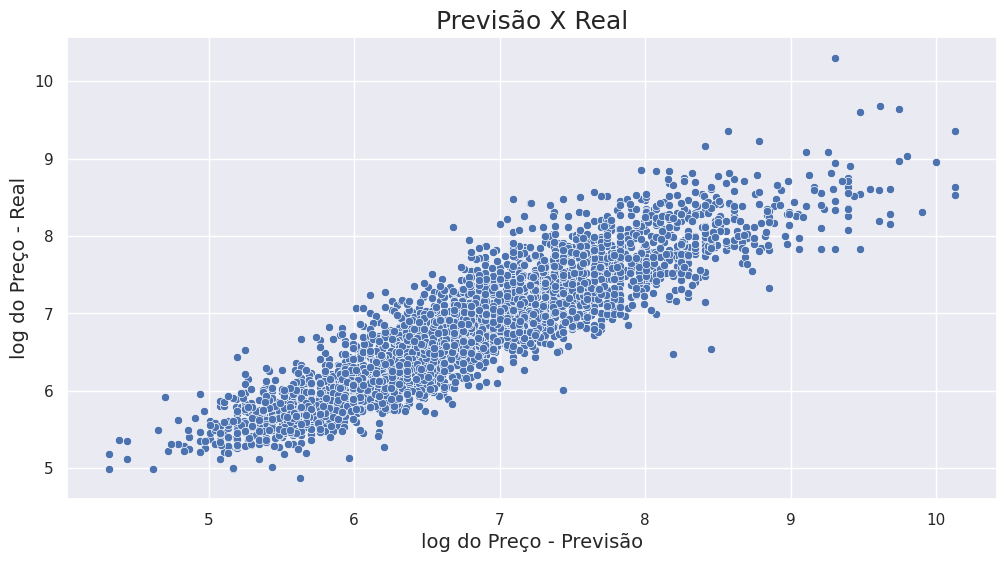

In [96]:
ax = sns.scatterplot(x=y_treino, y=y_previsto_treino)

ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
plt.show()

In [99]:
residuo = y_previsto_treino - y_treino

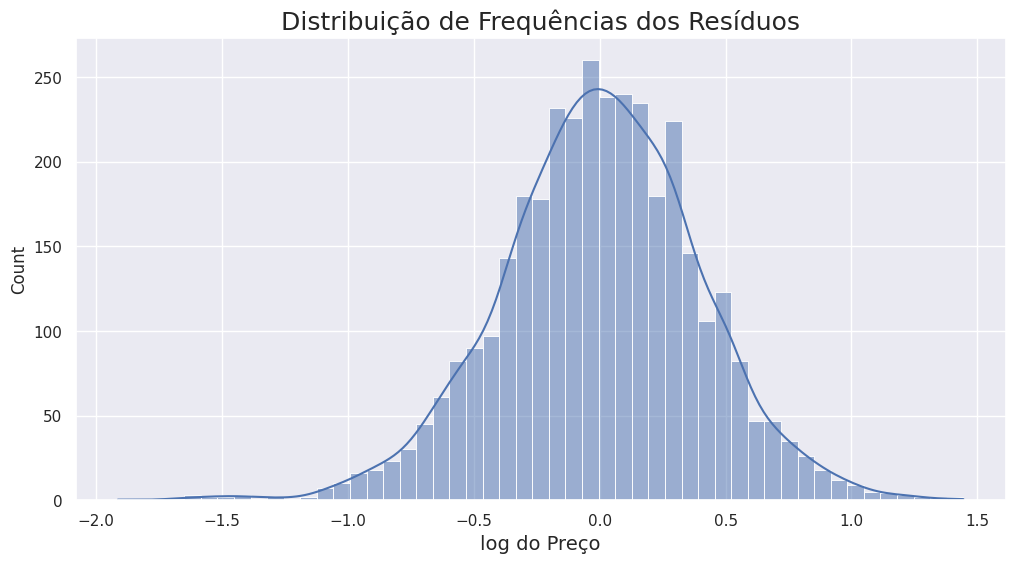

In [100]:
ax = sns.histplot(residuo, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
plt.show()

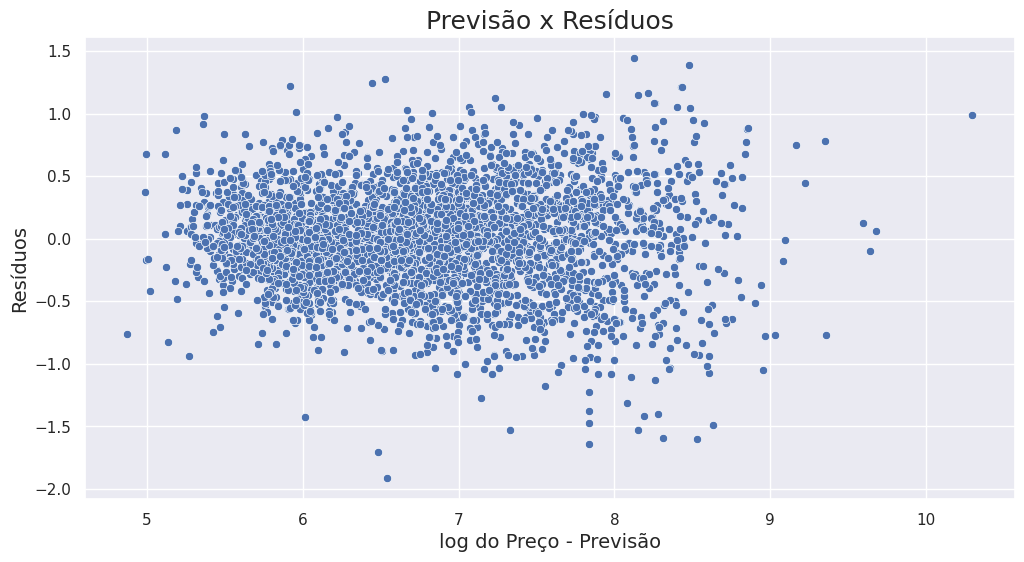

In [102]:
# Homocedasticidade do modelo
ax = sns.scatterplot(x= y_previsto_treino, y=residuo)

ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Resíduos', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.show()

### **Aplicando o modelo para precificar mais hospedagens**

In [ ]:
# Hospedagens a precificar:
hospedagens = pd.DataFrame({
    'area': [460, 360, 220, 500, 150, 280, 460, 260, 300, 180],
    'dist_praia': [5.5, 2.0 , 4.0 , 1.5, 1.0 , 6.0 , 3.0 , 1.0 , 0.5, 6.0 ],
    'piscina': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1] })
hospedagens

,area,dist_praia,piscina
0,460,5.5,1
1,360,2.0,0
2,220,4.0,0
3,500,1.5,1
4,150,1.0,0
5,280,6.0,0
6,460,3.0,1
7,260,1.0,0
8,300,0.5,0
9,180,6.0,1


In [114]:
hospedagens.columns = ["log_area", "log_dist_praia", "piscina"]

In [ ]:
hospedagens['log_area'] = np.log(hospedagens['log_area'])
hospedagens['log_dist_praia'] = np.log1p(hospedagens['log_dist_praia'])

In [119]:
previsoes = modelo.predict(hospedagens)
previsoes

array([4.06448688, 3.99092022, 3.80140902, 4.26693904, 3.9293515 ,
       3.78873468, 4.15095398, 4.03400909, 4.14648439, 3.8857032 ])

In [121]:
for i, previsao in enumerate(previsoes):
  print(f'Hospedagem {i+1}: R$ {np.exp(previsao):,.2f}')

Hospedagem 1: R$ 58.24
Hospedagem 2: R$ 54.10
Hospedagem 3: R$ 44.76
Hospedagem 4: R$ 71.30
Hospedagem 5: R$ 50.87
Hospedagem 6: R$ 44.20
Hospedagem 7: R$ 63.49
Hospedagem 8: R$ 56.49
Hospedagem 9: R$ 63.21
Hospedagem 10: R$ 48.70
